In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
input_csv = "input.csv"

In [3]:
df = pd.read_csv(input_csv)

In [4]:
relevant_columns = ['Country', 'Region', 'Pop. Density (per sq. mi.)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita) dollars']
df = df[relevant_columns]

In [5]:
df.rename(columns={'Pop. Density (per sq. mi.)':'Population_density',
                          'Infant mortality (per 1000 births)':'Infant_mortality',
                          'GDP ($ per capita) dollars':'GDP_per_cap_dollars'}, 
                 inplace=True)

In [6]:
df.iloc[:, 4] = df.iloc[:, 4].str.strip(' dollars')

In [7]:
df.replace('unknown', np.nan, inplace=True)

In [8]:
df["GDP_per_cap_dollars"] = df.GDP_per_cap_dollars.astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
Country                227 non-null object
Region                 227 non-null object
Population_density     222 non-null object
Infant_mortality       224 non-null object
GDP_per_cap_dollars    222 non-null float64
dtypes: float64(1), object(4)
memory usage: 8.9+ KB
None


In [9]:
df['Infant_mortality'] = df['Infant_mortality'].str.replace(',', '.')

In [10]:
df["Infant_mortality"] = df.Infant_mortality.astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
Country                227 non-null object
Region                 227 non-null object
Population_density     222 non-null object
Infant_mortality       224 non-null float64
GDP_per_cap_dollars    222 non-null float64
dtypes: float64(2), object(3)
memory usage: 8.9+ KB
None


In [11]:
df['Population_density'] = df['Population_density'].str.replace(',', '.')

In [12]:
df["Population_density"] = df.Population_density.astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
Country                227 non-null object
Region                 227 non-null object
Population_density     222 non-null float64
Infant_mortality       224 non-null float64
GDP_per_cap_dollars    222 non-null float64
dtypes: float64(3), object(2)
memory usage: 8.9+ KB
None


In [13]:
df['Population_density'] = df['Population_density'].replace(0, np.nan)

In [14]:
pd.set_option("display.max_rows", 250)

In [15]:
# dropping rows of Cook Islands, Western Sahara and Wallis and Futuna because of two or more missing columns
# df = df.drop(df.index[[47, 221,223]])
df = df.drop(df.index[223])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 5 columns):
Country                226 non-null object
Region                 226 non-null object
Population_density     220 non-null float64
Infant_mortality       224 non-null float64
GDP_per_cap_dollars    222 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.6+ KB
None


In [16]:
# replacing GDP Surnam with the mean
df['GDP_per_cap_dollars'] = df['GDP_per_cap_dollars'].replace(400000, np.nan)
#df['GDP_per_cap_dollars'] = df['GDP_per_cap_dollars'].fillna(df['GDP_per_cap_dollars'].mean())

In [17]:
# there are two rows with one missing column (GDP), for this rows, the missing value will be replaced by the mean
#df['GDP_per_cap_dollars'].fillna(df['GDP_per_cap_dollars'].mean())
df['GDP_per_cap_dollars'] = df['GDP_per_cap_dollars'].fillna(df['GDP_per_cap_dollars'].mean())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 5 columns):
Country                226 non-null object
Region                 226 non-null object
Population_density     220 non-null float64
Infant_mortality       224 non-null float64
GDP_per_cap_dollars    226 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.6+ KB
None


In [18]:
# there are five rows with one missing column (population density), for this rows, the missing value will be replaced by the mean
df['Population_density'] = df['Population_density'].fillna(df['Population_density'].mean())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 5 columns):
Country                226 non-null object
Region                 226 non-null object
Population_density     226 non-null float64
Infant_mortality       224 non-null float64
GDP_per_cap_dollars    226 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.6+ KB
None


In [19]:
df['Infant_mortality'] = df['Infant_mortality'].fillna(df['Infant_mortality'].mean())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 5 columns):
Country                226 non-null object
Region                 226 non-null object
Population_density     226 non-null float64
Infant_mortality       226 non-null float64
GDP_per_cap_dollars    226 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.6+ KB
None


In [20]:
# replacing GDP Surnam with the mean
#df['GDP_per_cap_dollars'] = df['GDP_per_cap_dollars'].replace(400000, np.nan)
#df['GDP_per_cap_dollars'] = df['GDP_per_cap_dollars'].fillna(df['GDP_per_cap_dollars'].mean())

In [21]:
pd.get_option("display.max_rows")

250

In [22]:
df['GDP_per_cap_dollars'].mean()

9759.27601809955

In [23]:
df['GDP_per_cap_dollars'].median()

5800.0

In [24]:
df['GDP_per_cap_dollars'].mode()

0    800.0
dtype: float64

In [25]:
df['GDP_per_cap_dollars'].std()

10011.365426723303

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fa505c0>]],
      dtype=object)

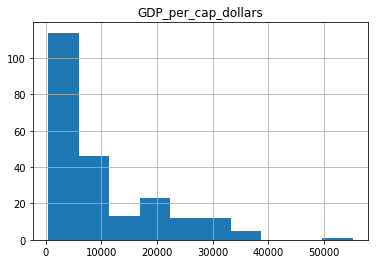

In [26]:
df.hist(column='GDP_per_cap_dollars')

There is one clear outlier. Inspecting the dataframe shows that this one outlier is surinam.
This number of 400000 is clearly an error, since the real GDP per capita is 5900.56 USD (source World Bank)

In [27]:
# replacing GDP Surnam with the mean
#df['GDP_per_cap_dollars'] = df['GDP_per_cap_dollars'].replace(400000, np.nan)

In [28]:
#df['GDP_per_cap_dollars'] = df['GDP_per_cap_dollars'].fillna(df['GDP_per_cap_dollars'].mean())

In [29]:
df['GDP_per_cap_dollars'].mean()

9759.27601809955

In [30]:
df['GDP_per_cap_dollars'].median()

5800.0

In [31]:
# afte replacing the outlier with the mean (Surnam), the standarddeviation decreases from 27937 to 10045
df['GDP_per_cap_dollars'].std()

10011.365426723303

In [32]:
df['GDP_per_cap_dollars'].mode()

0    800.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f924eb8>]],
      dtype=object)

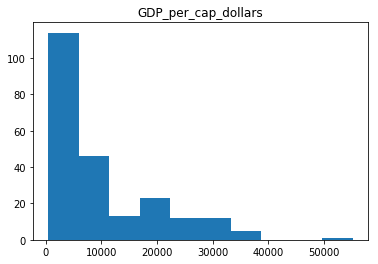

In [33]:
df.hist(column='GDP_per_cap_dollars', grid=False)

Text(0.5, 1.0, 'Histogram of GDP')

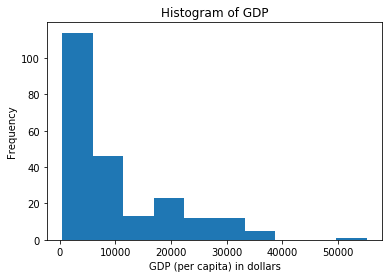

In [34]:
# Draw a graph with pandas and keep what's returned
ax = df['GDP_per_cap_dollars'].plot(kind='hist')

# Set the x-axis label
ax.set_xlabel("GDP (per capita) in dollars")

# Set title
ax.set_title("Histogram of GDP")

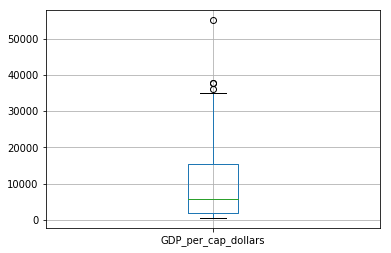

In [35]:
df.boxplot(column='GDP_per_cap_dollars')

Text(0.5, 1.0, 'Boxplot of GDP')

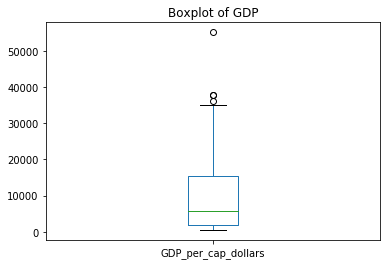

In [36]:
# Draw a graph with pandas and keep what's returned
ax_box = df['GDP_per_cap_dollars'].plot(kind='box')

# Set title
ax_box.set_title("Boxplot of GDP")

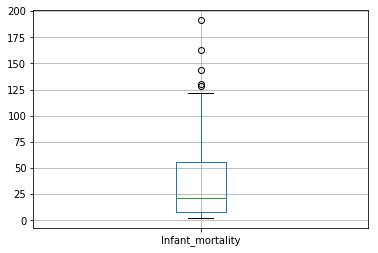

In [37]:
df.boxplot(column='Infant_mortality')

This boxplot shows 5 outliers. After manual checking, those inputs do not seem to be erroneous, because all those outliers are countries in dangerous and/or developing countries: Afghanistan, Angola, Liberia, Mozambique and Sierra Leone. For this reason, this data will not be removed/replaced.

In [38]:
df['Infant_mortality'].max()

191.19

In [39]:
df['Infant_mortality'].mode()

0    9.95
dtype: float64

In [40]:
df['Infant_mortality'].min()

2.29

In [41]:
df['Infant_mortality'].median()

21.04

In [42]:
df['Infant_mortality'].quantile(0.25)

8.2025

In [43]:
df['Infant_mortality'].quantile(0.75)

55.4225

In [44]:
df['GDP_per_cap_dollars'].max()

55100.0

In [45]:
df['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


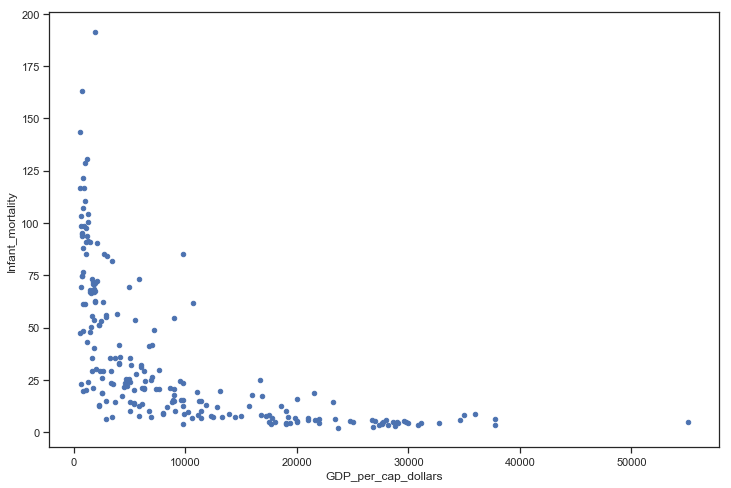

In [46]:
import seaborn
seaborn.set(style='ticks', rc={'figure.figsize': (12,8)})

#c='Region',
#colormap='viridis'

df.plot.scatter(x='GDP_per_cap_dollars',
                y='Infant_mortality')

In [47]:
df.head()

,Country,Region,Population_density,Infant_mortality,GDP_per_cap_dollars
0,Afghanistan,ASIA (EX. NEAR EAST),48.0,163.07,700.0
1,Albania,EASTERN EUROPE,124.6,21.52,4500.0
2,Algeria,NORTHERN AFRICA,13.8,31.00,6000.0
3,American Samoa,OCEANIA,290.4,9.27,8000.0
4,Andorra,WESTERN EUROPE,152.1,4.05,19000.0


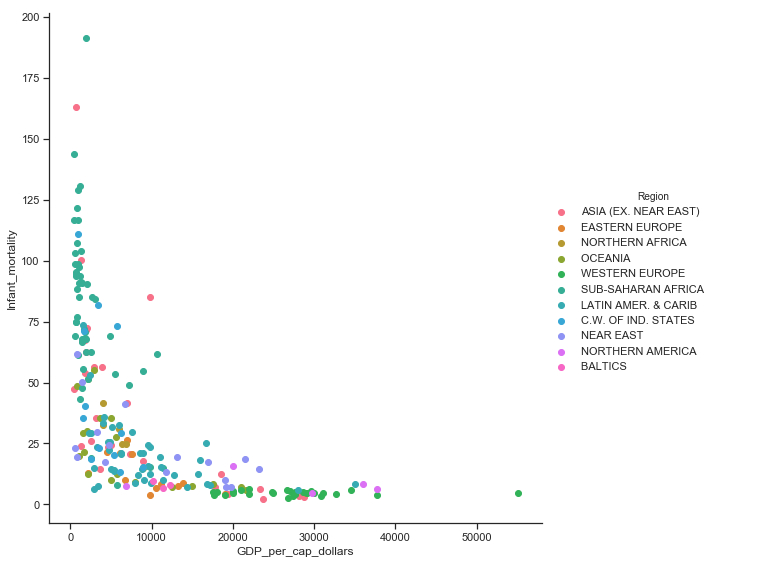

In [48]:
#seaborn.set(style='ticks', rc={'figure.figsize': (18,8)})
fg = seaborn.FacetGrid(data=df, hue='Region', height=8)
fg.map(plt.scatter, 'GDP_per_cap_dollars', 'Infant_mortality').add_legend()

In [49]:
fig, ax = plt.subplots()

colormap = cm.viridis
#colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(df['Region'].unique()))]
colorlist = [colors.rgb2hex(colormap(i)) for i in len(df['Region'].unique())

for i,c in enumerate(colorlist):

    x = df['GDP_per_cap_dollars'][i]
    y = df['Infant_mortality'][i]
    l = df['Region'][i]

    ax.scatter(x, y, label=l, s=50, linewidth=0.1, c=c)

ax.legend()

plt.show()

SyntaxError: invalid syntax (<ipython-input-49-366afdb441af>, line 7)

In [ ]:
df_colored_regions = df

In [ ]:
df_colored_regions['Region'].unique()

In [ ]:
df_colored_regions['Region'] = df_colored_regions['Region'].replace('ASIA (EX. NEAR EAST)         ', 7)
df_colored_regions['Region'] = df_colored_regions['Region'].replace('EASTERN EUROPE                     ', 2)
df_colored_regions['Region'] = df_colored_regions['Region'].replace('NORTHERN AFRICA                    ', 10)
df_colored_regions['Region'] = df_colored_regions['Region'].replace('OCEANIA                            ', 5)
df_colored_regions['Region'] = df_colored_regions['Region'].replace('WESTERN EUROPE                     ', 1)
df_colored_regions['Region'] = df_colored_regions['Region'].replace('SUB-SAHARAN AFRICA                 ', 11)
df_colored_regions['Region'] = df_colored_regions['Region'].replace('LATIN AMER. & CARIB    ', 8)
df_colored_regions['Region'] = df_colored_regions['Region'].replace('C.W. OF IND. STATES ', 9)
df_colored_regions['Region'] = df_colored_regions['Region'].replace('NORTHERN AMERICA                   ', 4)
df_colored_regions['Region'] = df_colored_regions['Region'].replace('BALTICS                            ', 3)
df_colored_regions['Region'] = df_colored_regions['Region'].replace('NEAR EAST                          ', 6)

In [ ]:
#df_colored_regions.reset_index(inplace=True)

In [ ]:
df_colored_regions.plot.scatter(x='GDP_per_cap_dollars',
                                y='Infant_mortality',
                                c='Region',
                                colormap='viridis')

In [ ]:
df.set_index('Country', inplace=True)

In [ ]:
df_json = df.to_json('data2.json', orient='index')

In [ ]:
print(df_json)

In [ ]:
type(df_json)

In [ ]:
import json

with open('data.json', 'w') as outfile:
    json.dump(df_json, outfile)